In [118]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
#print(iris)
data = iris.data
#print(data)
features = iris.feature_names
# print(features)
labels = iris.target
classes = iris.target_names
# print(labels)
# print(classes)      # ['setosa' 'versicolor' 'virginica']

# check elements in each class
for i in range(len(classes)):
    print(f'elements in class {classes[i]}: {len([label for label in labels if label == i])}')

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
elements in class setosa: 50
elements in class versicolor: 50
elements in class virginica: 50


In [99]:
# accuracy calculator
def accuracy_calculator(knn, data, labels):
    y_hat = knn.predict(data)

    correct_pred_count = len([i for i in range(len(labels)) if y_hat[i] == labels[i]])
    accuracy = correct_pred_count / len(labels)          # corrected predicted / total
    return accuracy
    

In [101]:
# For 6.2 k = 1
# print(data)
# print(labels)

# initialize knn_1 when k = 1
knn_1 = KNeighborsClassifier(n_neighbors = 1)

# train the model
knn_1.fit(data, labels)
accuracy_1 = accuracy_calculator(knn_1, data,labels)
print(f"accuracy of knn_1(when k = 1) is {accuracy_1 * 100} %.")

accuracy of knn_1(when k = 1) is 100.0 %.


[100.0, 98.66666666666667, 98.66666666666667, 98.66666666666667, 97.33333333333334, 98.66666666666667, 98.66666666666667, 97.33333333333334, 98.66666666666667, 97.33333333333334, 96.0, 96.0, 96.0, 97.33333333333334, 97.33333333333334, 97.33333333333334, 97.33333333333334, 97.33333333333334, 97.33333333333334, 97.33333333333334, 97.33333333333334, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333333333333, 94.66666666666667, 93.33333333333333, 96.0, 94.66666666666667, 90.66666666666666, 90.66666666666666, 90.66666666666666, 92.0, 85.33333333333334, 82.66666666666667, 82.66666666666667, 82.66666666666667, 81.33333333333333, 81.33333333333333, 81.33333333333333, 81.33333333333333, 80.0, 78.66666666666666]
[90.66666666666666, 89.33333333333333, 93.33333333333333, 92.0, 96.0, 93.33333333333333, 96.0, 94.66666666666667, 97.33333333333334, 94.66666666666667, 94.66666666666667, 93.33333333333333, 93.33333333333333, 93.33333

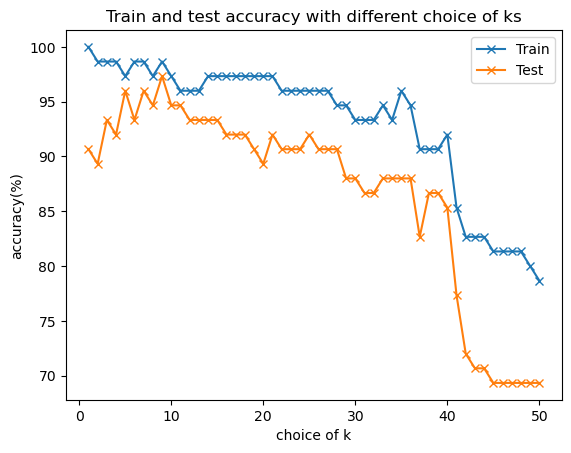

In [103]:
def find_optimal_k(X,y):
    # X: data
    # y: labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, shuffle = True, random_state = 0)
    k_range = [i for i in range(1, 51)]
    train_accuracy_list = []
    test_accuracy_list = []

    for k in k_range:
        knn_k = KNeighborsClassifier(n_neighbors = k)
        knn_k.fit(X_train, y_train)

        train_accuracy = accuracy_calculator(knn_k, X_train, y_train)*100
        test_accuracy = accuracy_calculator(knn_k, X_test, y_test)*100

        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)

    print(train_accuracy_list)
    print(test_accuracy_list)
    # plot graph for test and train accuracy
    plt.plot(k_range, train_accuracy_list, 'x-')
    plt.plot(k_range, test_accuracy_list, 'x-')
    plt.xlabel('choice of k')
    plt.ylabel('accuracy(%)')
    plt.legend(['Train','Test'])
    plt.title("Train and test accuracy with different choice of ks")
    plt.show()
    
find_optimal_k(data, labels)


##### According to the graph above, when k = 9, the training accuracy and testing accuracy become most closest and this means the model has the best ability to generalize when k = 9, indicating the best possible performance.  So 9 is the optimal k. 

In [116]:
# apply the model for prediction: 
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(data, labels)
new_iris = [[5.0, 4.1, 3.8, 1.2]]
idx = knn_9.predict(new_iris)[0]
print(f"the model predicts that the class is {classes[idx]}")

the model predicts that the class is versicolor
